# 1.1. What are convolutions?
**Goal:** Explain what the term "convolution" means with some pure python examples.

In [1]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt

## Convolutions in 1D
Let's start by exploring what it means to perform convolution.

Take the example below, we first start by generating an input tensor of 100 random numbers where we have 
We can imagine that this may be some sort of time series dataset, a spectogram, or any variety of 
other 1D datasets that exist.

In [2]:
x1 = torch.randn(100)
print(f'x1.shape: {x1.shape}.')

x1.shape: torch.Size([100]).


A convolution on this input data $x_{1}$ is simply a matrix (or vector in this case, as the data is 1D) called the "kernel",
that slides across the input data and performs a pointwise multiplication and summation.

Analyse the next code block carefully. Here we create a 1D convolution kernel of $k_{1}$ and 'convolve' ($*$) it
with the input tensor $x_{1}$.

Mathematically, we convolve $x_{1} * k_{1}$ where $x_{1} \in \R^{1 \times m_{x}}$ is any 1D tensor and 
$k_{1} \in \R^{1 \times m_{k}}$ is any 1D kernel, and in this case $m_{k} = 3$.

All this really means is that the centre of the kernel $k_{1}$ is placed over a position in then 
input tensor $x_{1}$, overlapping digits are multiplied and summed, to find the value of the 
corresponding cell in the output tensor. Notice the 'edge' cases where the centre of the kernel
is placed on the first or last digits in $x_{1}$, the kernel is falling off the edges of the input 
tensor. In these cases, we need to pad the input tensor in some way, below we simply pad the input
tensor with 0's. 

In [3]:
k1 = torch.Tensor([0.2, 0.6, 0.2])  # the kernel

def convolve_1d(kernel, x):
    print(f'kernel: {kernel}')
    assert len(kernel.shape) == 1 and len(x.shape) == 1

    kernel_size = kernel.shape[0]
    assert kernel_size % 2 != 0  # assert kernel size is odd

    print(f'Input length: {len(x)}')
    print(f'Kernel size: {kernel_size}')

    y = torch.zeros_like(x)

    padding = kernel_size // 2
    x_padded = F.pad(x1, [padding, padding])

    print(f'Padded the left and right or input `x` with {padding} "0"s. x_padded: {x_padded[0:3]} ... \n' )
    
    for i in range(len(x)):
        y[i] = torch.sum(
            kernel * x_padded[i: i + kernel_size]
        )

    return y

y1 = convolve_1d(k1, x1)

kernel: tensor([0.2000, 0.6000, 0.2000])
Input length: 100
Kernel size: 3
Padded the left and right or input `x` with 1 "0"s. x_padded: tensor([ 0.0000, -1.4134, -0.6099]) ... 



By plotting the output, we can see that the above convolution simply had the effect of averaging
any given point with it's neighbours.

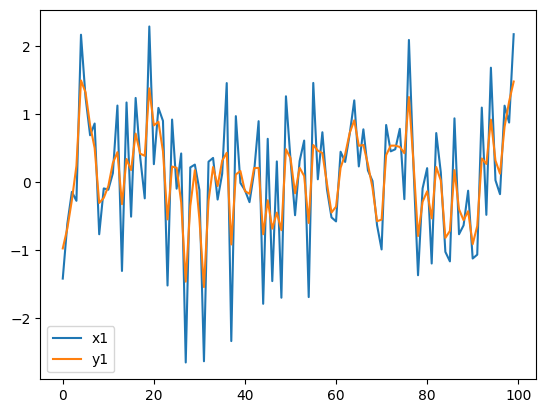

In [4]:
plt.plot(x1, label='x1')
plt.plot(y1, label='y1')
plt.legend()
plt.show()

## Convolutions in 2D
Convolutions in 2D follow the same principle. 
In this case we have a 2D input matrix (maybe and image) and a 2D kernel matrix.
The kernel is slid horizontally and vertically over the input matrix.

A day to day example of a 2D convolution is the gaussian blur kernel, this is what is used when
you want to blur images, which you may have done if you've ever edited an image.